In [1]:
import json
import gensim
import gensim.models.keyedvectors as word2vec
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
model = word2vec.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [3]:
sentences = [['sugar', 'salt', 'flour'], ['sugar', 'salt', 'flour']]

In [4]:
f = open('recipes_with_nutritional_info.json')
  
data = json.load(f)
print(len(data))

51235


In [5]:
ingred_list = []
main_ingred_list = []
for i in range(len(data)):
    temp = []
    temp_main_ingred = []
    for j in range(len(data[i]['ingredients'])):
        temp.append(data[i]['ingredients'][j]['text'])
        temp_main_ingred.append(data[i]['ingredients'][j]['text'].split(',')[0])
    ingred_list.append(temp)
    main_ingred_list.append(temp_main_ingred)

In [6]:
ingred_list = np.array(ingred_list)
ingred_list[1]

/var/folders/n3/x717qjr967gcwtfqk34fw0s00000gn/T/ipykernel_1921/2173849157.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ingred_list = np.array(ingred_list)


['sugars, granulated',
 'oil, corn, peanut, and olive',
 'egg substitute, powder',
 'orange juice, raw',
 'orange juice, raw',
 'leavening agents, baking powder, double-acting, sodium aluminum sulfate',
 'wheat flour, white, all-purpose, unenriched']

In [7]:
def word2veclist(words):
    vec = np.zeros(300)
    for i in range(len(words)):
        string = words[i].split(',')[0]
#         print(string)
        string = nltk.word_tokenize(string)
        string = [word.lower() for word in string if word.isalpha()]

#         print(string)
        
        for j in range(len(string)):
            try:
                vec = vec + model[string[j]]
            except:
                continue
    return vec    

In [8]:
sentence_embedding = []
for words in ingred_list[:10000]:
    wordlist_embedding = word2veclist(words)
    sentence_embedding.append(wordlist_embedding)
#     print(len(wordlist_embedding))
    
sentence_embedding = np.array(sentence_embedding)

print(len(sentence_embedding))
print(sentence_embedding)

10000
[[-0.21081543  0.37084961  0.19946289 ...  0.73535156  0.74462891
   0.07055664]
 [-1.00476074 -0.64135742  0.11801147 ...  0.57958984  1.01158142
   0.6842041 ]
 [-0.69204712  1.5453577   0.73266602 ...  0.10279846  1.49221802
   0.47622681]
 ...
 [-1.57592773  3.03857422  1.71154785 ... -0.0848999   2.69018555
   2.42041016]
 [-0.6040802   1.19286227  0.53100586 ...  0.0894165   1.9855957
   0.67016602]
 [ 0.38415527  0.09301758 -0.03274536 ...  0.34295654  1.00657654
  -0.09130859]]


In [9]:
pca = PCA(2)
df = pca.fit_transform(sentence_embedding)
df.shape

(10000, 2)

In [10]:
df

array([[-7.24119216,  0.34573678],
       [ 3.519373  ,  4.41599596],
       [16.79217629, -6.62632021],
       ...,
       [10.07166967, -7.75006722],
       [ 2.41276152, -4.15067455],
       [ 4.67174323,  5.9282511 ]])

In [11]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(df)
 
print(label)

[1 3 4 ... 4 0 3]


In [12]:
for i in range(len(label)):
    if(label[i] == 4):
        print(label[i], data[i]['id'], data[i]['title'], main_ingred_list[i])

4 00059b093b Honey Sriracha Chicken Wings ['chicken', 'salt', 'spices', 'oil', 'butter', 'sauce', 'honey', 'rice', 'soy sauce made from soy (tamari)', 'sauce', 'salt', 'spices']
4 0038bb9065 Hearty Cheese (And Turkey) Soup ['ground turkey', 'onions', 'potatoes', 'soup', 'celery', 'salt', 'spices', 'spices', 'spices', 'wheat flour', 'milk', 'cheese', 'cream']
4 004979f520 Broccoli Cheese Soup ['butter', 'onions', 'celery', 'carrots', 'wheat flour', 'cornstarch', 'soup', 'milk', 'cheese', 'spices', 'spices', 'broccoli']
4 005836ace7 My Easy Chicken Ala King ['butter', 'chicken', 'mushrooms', 'wheat flour', 'salt', 'spices', 'soup', 'cream', 'peas', 'spices']
4 005f01f360 Rib Dry Rub ['spices', 'spices', 'spices', 'onions', 'spices', 'sugars', 'salt', 'spices', 'spices', 'spices']
4 007c4c6280 West African Chicken-Peanut Soup ['chicken', 'onions', 'spices', 'oil', 'spices', 'salt', 'spices', 'spices', 'soup', 'tomatoes', 'tomatoes', 'peanut butter', 'rice']
4 007e544c80 Cream of Fresh Cau

4 1c764a67e4 Ginger Chicken Stir Fry ['oil', 'chicken', 'celery', 'carrots', 'sugars', 'onions', 'spices', 'soup', 'cornstarch', 'soy sauce made from soy (tamari)', 'spices']
4 1c7cbaae1b Simply Chicken Salad ['salad dressing', 'cream', 'cream', 'lemon juice', 'salt', 'spices', 'chicken', 'celery', 'onions', 'nuts']
4 1c7e1e854c Chicago-Style BBQ Ribs ['catsup', 'sugars', 'sauce', 'vinegar', 'sugars', 'sauce', 'spices', 'spices', 'pork']
4 1ca21e2e36 Pork Ribs With Apple Barbecue Sauce ['pork', 'apple juice', 'vinegar', 'tomatoes', 'sugars', 'sauce', 'spices', 'spices', 'spices', 'spices', 'salt']
4 1cc8ecdf52 Dry Enchilada Sauce Mix Substitute ['spices', 'spices', 'cornstarch', 'salt', 'onions', 'sugars', 'spices', 'spices', 'spices', 'spices', 'spices']
4 1cdf63ecaa Thai Chicken With Fresh Basil ['oil', 'spices', 'onions', 'chicken', 'sauce', 'soy sauce made from soy (tamari)', 'water', 'sugars', 'peppers', 'spices']
4 1cdfe64d88 Flank Steak Marinade ['salt', 'spices', 'spices', 'spi

[[-7.24119216  0.34573678]
 [ 3.519373    4.41599596]
 [16.79217629 -6.62632021]
 ...
 [10.07166967 -7.75006722]
 [ 2.41276152 -4.15067455]
 [ 4.67174323  5.9282511 ]]


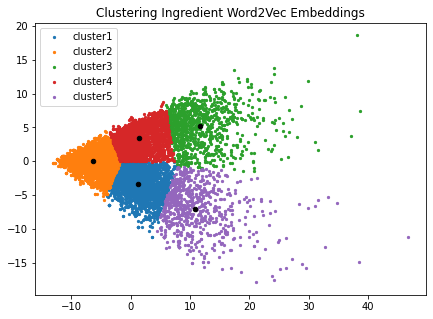

In [13]:
centroids = kmeans.cluster_centers_

#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = 'cluster'+str(i+1), s = 5)
print(df)

plt.title('Clustering Ingredient Word2Vec Embeddings')    
fig = plt.gcf()
fig.set_size_inches(7.0, 5.0)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 20, color = 'k')
plt.legend()
plt.show()